Projeto de análise de dados e aplicação de tecnicas de Classificação em cima da base de dados de churn de uma empresa de telecom

- Customer ID (ID do Cliente): Identificação única do cliente.

- Gender (Gênero): O gênero do cliente, indicando se é masculino ou feminino.

- SeniorCitizen (Idoso): Indica se o cliente é um idoso (1) ou não (0).

- Partner (Parceiro): Indica se o cliente tem um parceiro (Sim) ou não (Não).

- Dependents (Dependentes): Indica se o cliente possui dependentes (Sim) ou não (Não).

- **Tenure** (Tempo de Permanência): O número de meses que o cliente permaneceu com a empresa.

- PhoneService (Serviço de Telefone): Indica se o cliente possui serviço de telefone (Sim) ou não (Não).

- MultipleLines (Linhas Múltiplas): Indica se o cliente possui múltiplas linhas de telefone (Sim, Não, Sem serviço de telefone).

- InternetService (Serviço de Internet): O provedor de serviço de internet do cliente (DSL, Fibra óptica, Não).

- OnlineSecurity (Segurança Online): Indica se o cliente possui segurança online (Sim, Não, Sem serviço de internet).

- OnlineBackup (Backup Online): Indica se o cliente possui backup online (Sim, Não, Sem serviço de internet).

- DeviceProtection (Proteção de Dispositivos): Indica se o cliente possui proteção de dispositivos (Sim, Não, Sem serviço de internet).

- TechSupport (Suporte Técnico): Indica se o cliente possui suporte técnico (Sim, Não, Sem serviço de internet).

- StreamingTV (TV por Streaming): Indica se o cliente possui serviço de TV por streaming (Sim, Não, Sem serviço de internet).

- StreamingMovies (Filmes por Streaming): Indica se o cliente possui serviço de filmes por streaming (Sim, Não, Sem serviço de internet).

- Contract (Contrato): O termo do contrato do cliente (Mensal, Anual, Bienal).

- PaperlessBilling (Faturamento sem Papel): Indica se o cliente recebe faturas sem papel (Sim) ou em papel (Não).

- PaymentMethod (Método de Pagamento): O método de pagamento do cliente (Cheque Eletrônico, Cheque Enviado, Transferência Bancária Automática, Cartão de Crédito Automático).

- MonthlyCharges (Custos Mensais): O valor cobrado ao cliente mensalmente.

- TotalCharges (Custos Totais): O valor total cobrado ao cliente.

- Churn (Churn): Indica se o cliente cancelou o serviço (Sim) ou não (Não).

# Importação das bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# ANalise exploratória
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
import plotly.subplots as sp

# Machine learning
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

# Carregamento da Base de Dados

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 3/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

Verificando a existencia de valores nulos

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Analisando algumas infos iniciais da base de dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

Vamos plotas alguns histogramas base pra ter um entendimento inicial da base de dados

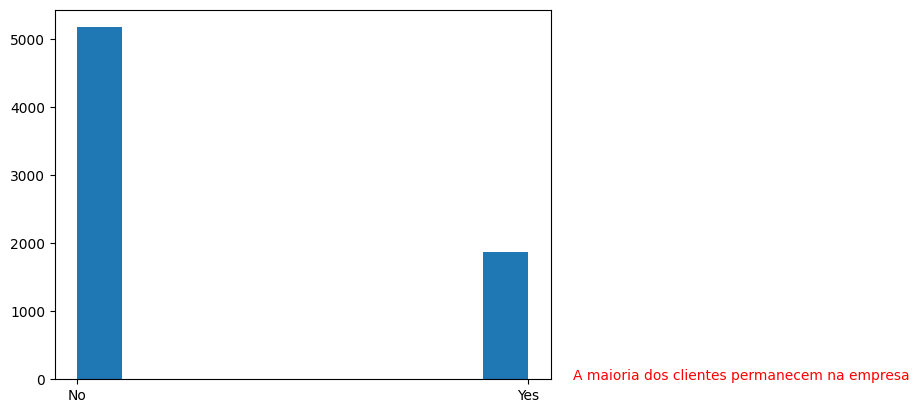

In [7]:
plt.hist(x=df['Churn'])
_ = plt.text(1.1, 0.05, "A maioria dos clientes permanecem na empresa", color='r')

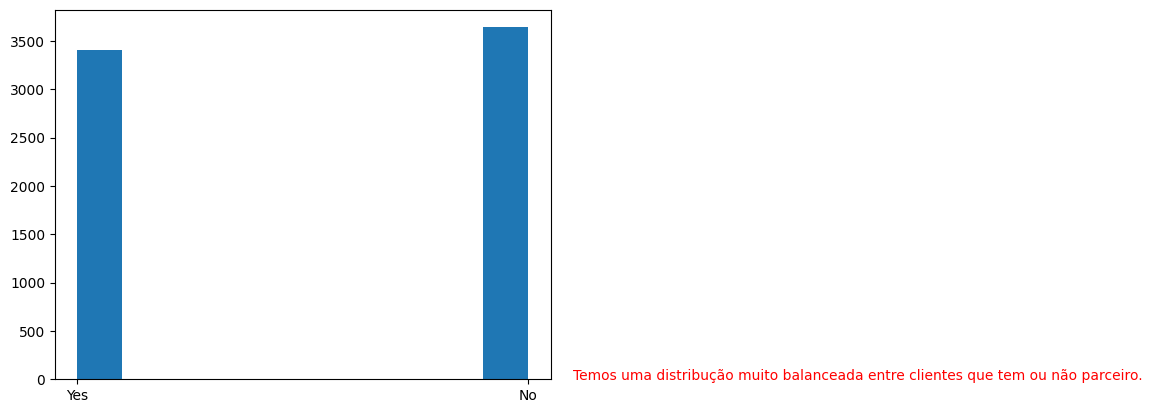

In [8]:
plt.hist(x=df['Partner'])
_ = plt.text(1.1, 0.05, "Temos uma distribução muito balanceada entre clientes que tem ou não parceiro.", color='r')

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

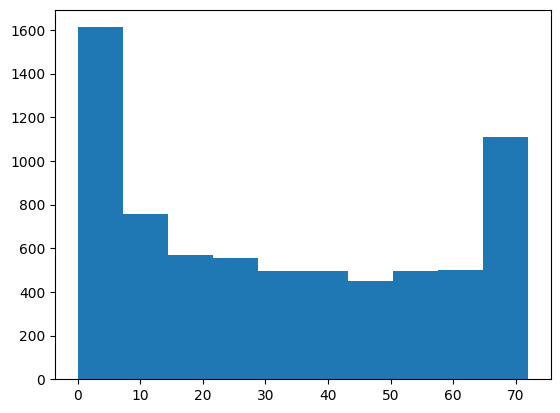

In [9]:
plt.hist(x=df['tenure'])

In [10]:
print(df['tenure'].min(), df['tenure'].max())

0 72


É possivel analisar que muitos clientes tem uma permanencia de 0 meses, vamos analisar isso

In [11]:
df.query("tenure == 0").head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


# Analise exploratória dos dados

## Tenure

O grafico de permanencia mostra que grande parte dos clientes ficam por menos de 5 meses ou por mais de 65, vamos tentar entender melhor essa relação

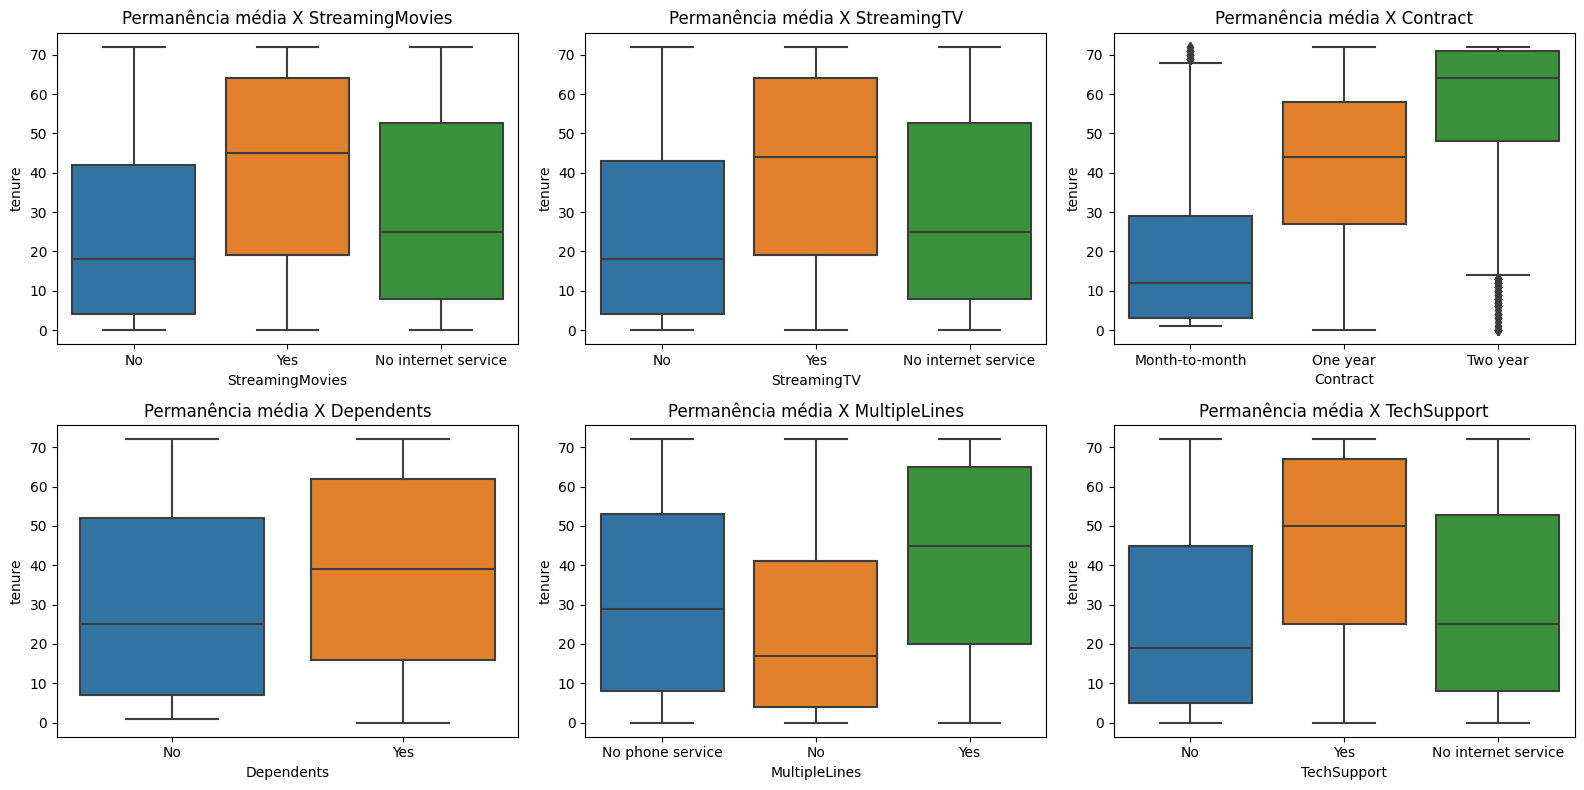

In [12]:
# Crie uma figura com subplots
fig, axes = plt.subplots(2,3, figsize=(16, 8))

# Lista de colunas de interesse para os subplots
colunas_interesse = ['StreamingMovies', 'StreamingTV', 'Contract', 'Dependents' , 'MultipleLines' ,'TechSupport']

# Itere pelas colunas de interesse e crie os subplots
for i, coluna in enumerate(colunas_interesse):
    # Calcule as coordenadas do subplot atual
    linha = i // 3
    col = i % 3

    # Plote o gráfico de caixa no subplot atual
    sns.boxplot(data=df, x=coluna, y='tenure', ax=axes[linha, col])
    axes[linha, col].set_title(f'Permanência média X {coluna}')

# Ajuste o layout
plt.tight_layout()

# Exiba a figura
plt.show()

- Numa visão geral, conseguimos perceber uma relação de que as pessoas que não possuem um serviço adicional tem uma tendencia consideralvelmente maior de ficar pouco tempo na empresa, em todos os casos testados(StreamingTV , StreamingMovies, MultipleLines, InternetService) os clientes que ficaram mais tempo na empresa são aqueles que possuem esses serviços
- Os clientes com contratos maiores tem uma tendencia absurdamente maior a ficar na empresa, evitando ao maximo romper o contrato, logo, talvez seja interessante insistir em contratos maiores na hora de contratar ou renovar o plano
- Os clientes com dependentes tendem a ficar por mais tempo, porem com pouca diferença entre os que não tem dependentes

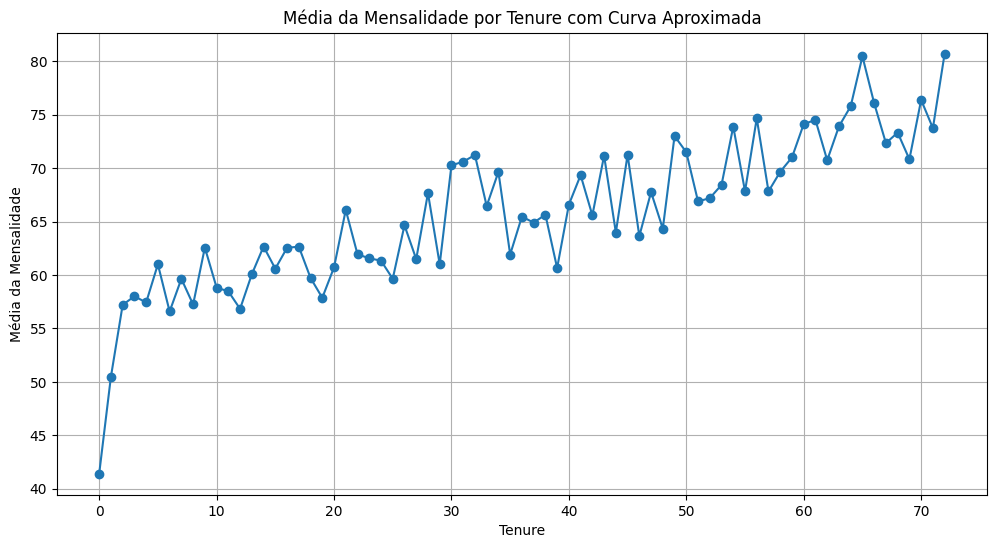

In [13]:
# Calcular a média da mensalidade para cada valor único de 'tenure'
tenure_mean_monthly_charges = df.groupby('tenure')['MonthlyCharges'].mean()

# Criar um array de valores de 'tenure' para interpolação
x = tenure_mean_monthly_charges.index

# Interpolar os valores da média da mensalidade para criar uma linha suave
y = np.interp(x, x, tenure_mean_monthly_charges.values)

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Média da Mensalidade')
plt.xlabel('Tenure')
plt.ylabel('Média da Mensalidade')
plt.title('Média da Mensalidade por Tenure com Curva Aproximada')
plt.grid(True)

# Exibir o gráfico
plt.show()


Esse grafico complementa o primeiro insight tirado nos subplots passados, que mostrava que as pessoas que tinham serviços adicionais nos seus planos tinham uma taxa de permanencia maior, isso é confirmado por esse outro grafico, evidenciando que as pessoas com menor taxa de permanencia sao aquelas com as menores mensalidades

Vamos tentar deixar essa relação ainda mais evidente comparando o tempo de permanencia com as pessoas que nao tem nenhum serviço adicional com as pessoas que tem ao menos um plano adicional

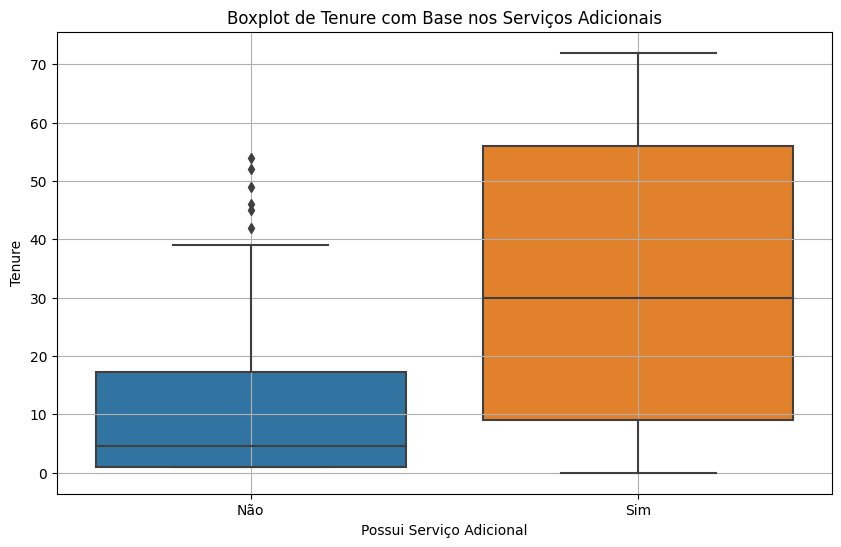

In [14]:
# Defina as colunas que representam os serviços adicionais
colunas_servicos_adicionais = ['PhoneService', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'InternetService', 'MultipleLines', 'DeviceProtection']

# Crie uma nova coluna 'Possui_Servico_Adicional' com base nas colunas especificadas
df['additional_service'] = df[colunas_servicos_adicionais].apply(lambda row: 1 if 'Yes' in row.values else 0, axis=1)

# Crie o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='additional_service', y='tenure')
plt.xlabel('Possui Serviço Adicional')
plt.ylabel('Tenure')
plt.title('Boxplot de Tenure com Base nos Serviços Adicionais')
plt.xticks([0, 1], ['Não', 'Sim'])  # Personalize os rótulos do eixo X
plt.grid(True)

# Exiba o gráfico
plt.show()

Com isso a nossa conslusão se comprovou com grande clareza, no geral **as pessoas que tem algum tipo de serviço adicional tendem a ficar por mais tempo na empresa**

## Contract

Como vimos anteriormente, contrato é um otimo indicador para entender a permanencia dos clientes na empresa. mas o que determina a escolha do cliente por cada tipo de contrato?

Vamos analisar a relação entre o tamanho do contrato e se o cliente tem algum serviço adicional

<Axes: xlabel='Contract', ylabel='count'>

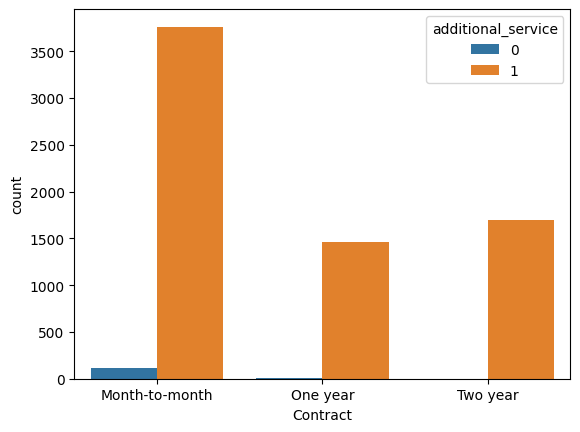

In [15]:
sns.countplot(data=df, x='Contract', hue='additional_service')

Com isso, percebemos que, apesar da grande maioria dos clientes possuirem serviços adicionais, Grande parte dos clientes que nao possuem tem um contrato mensal, uma pequena parcela possue de 1 ano, e nenhum com 2 anos, **indicando que a maioria das pessoas que não tem serviços adicionais preferem fazer contratos menores**

<Axes: xlabel='Contract', ylabel='count'>

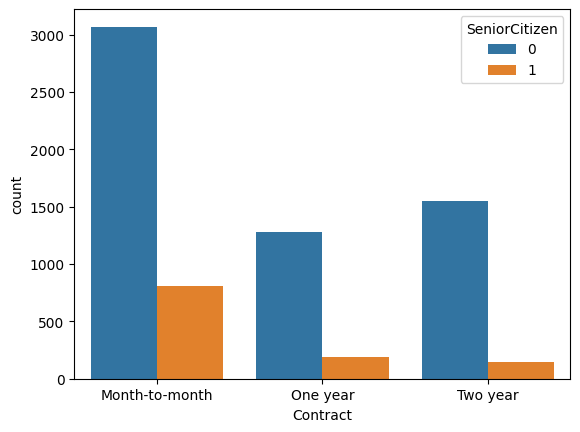

In [16]:
sns.countplot(data=df, x='Contract', hue='SeniorCitizen')

Podemos inferir a partir desse grafico que os idosos preferem por fazer planos menores, a empresa poderia focar em dar beneficios para mais velhos escolherem planos mais longos

<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

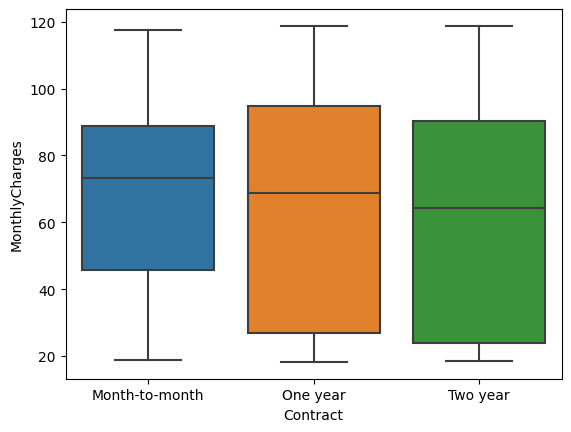

In [17]:
sns.boxplot(data=df, x='Contract', y='MonthlyCharges')

A mediana do preço não varia consideravelmente com o tipo de contrato, porem os planos com maior tempo de assinatura possuem mais valores baixos do que o mensal, porem como a mediana não é tao diferente, não podemos inferir uma grande relação entre tempo contratual e mensalidade

## Partner X Dependents

Vamos analisar se as pessoas que possuem um parceiro tendem a ter dependentes, justamente por ter um parceiro

<Axes: xlabel='Dependents', ylabel='count'>

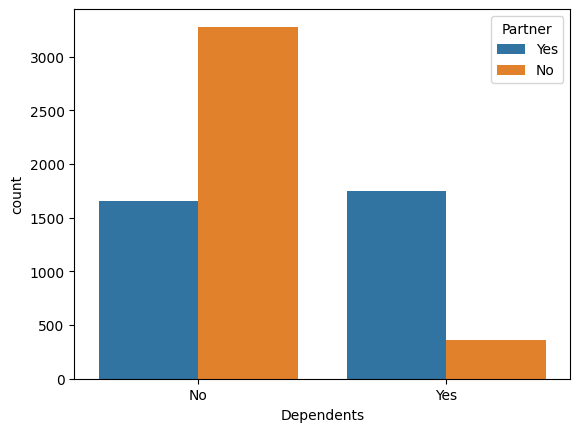

In [18]:
sns.countplot(data=df, x='Dependents', hue='Partner')

As duas variaveis tem uma forte correlação, **Mostrando que a grande maioria das pessoas que tem dependente possuem também um parceiro**, indicando que a maioria das pessoas costuma colocar seu parceiro como dependente

## StreamingMovies X StreamingTV

<Axes: xlabel='StreamingTV', ylabel='count'>

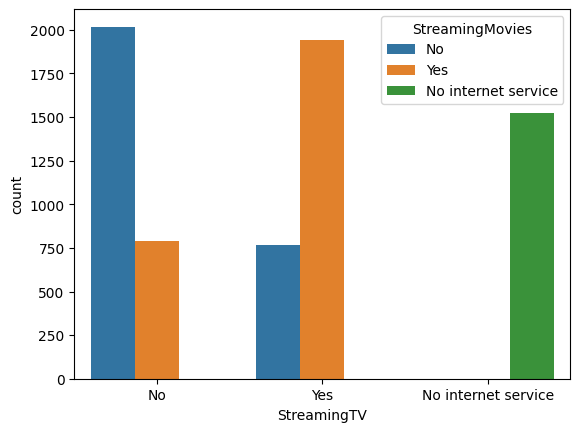

In [19]:
sns.countplot(data=df, x='StreamingTV', hue='StreamingMovies')

Percebemos que a grande maioria das pessoas que assinam o Streaming de TV também assinam o de Filmes, e geralmente quem não assina um também não assina o outro

## OnlineBackup, OnlineSecurity, DeviceProtection

Vamos analisar se existe uma especie de perfil de pessoas que são mais "seguras" , preferindo opções adicionais de segurança

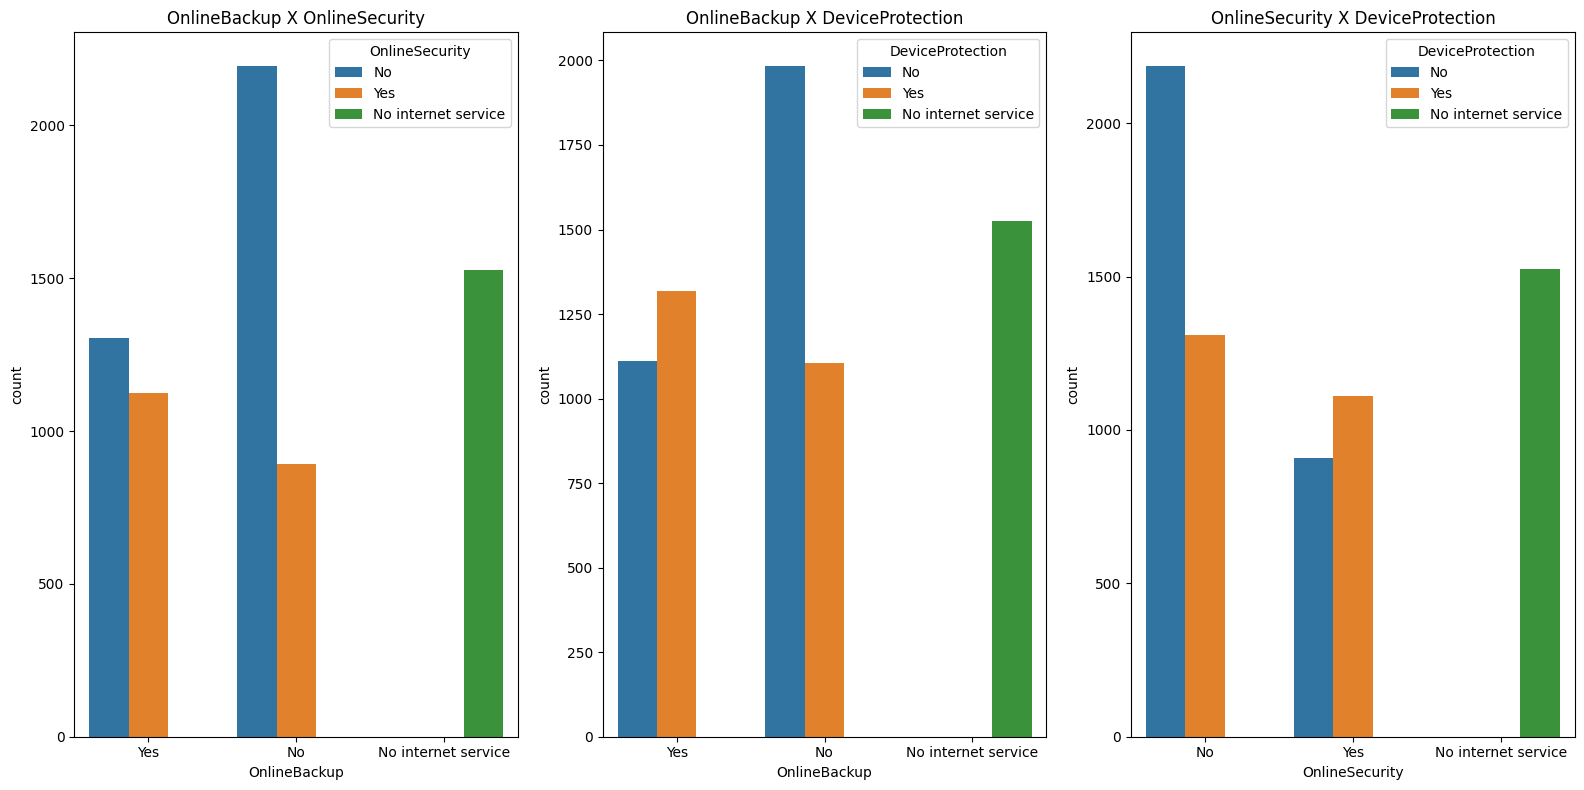

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# OnlineBackup X OnlineSecurity
sns.countplot(data=df, x='OnlineBackup', hue='OnlineSecurity', ax=axes[0])
axes[0].set_title('OnlineBackup X OnlineSecurity')

# OnlineBackup X DeviceProtection
sns.countplot(data=df, x='OnlineBackup', hue='DeviceProtection', ax=axes[1])
axes[1].set_title('OnlineBackup X DeviceProtection')

# OnlineSecurity X DeviceProtection
sns.countplot(data=df, x='OnlineSecurity', hue='DeviceProtection', ax=axes[2])
axes[2].set_title('OnlineSecurity X DeviceProtection')

# Ajuste o layout
plt.tight_layout()

# Exiba os subplots
plt.show()

Em todos os casos analisados, percebemos que geralmente quando o cliente recusa uma das formas de segurança ele recusa todas. Porem, no caso contrário, geralmente quando ele aceita uma há uma probabiidade muito maior de ele aceitar uma segunda, talvez valha a pena investir em planos promocionais que incluam os 3 serviços de segurança juntos

## Churn

Mudando o Churn para ao inves de ser Yes ou No, ser 0 ou 1, para fazer gráficos melhores e mais interpretáveis

In [21]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

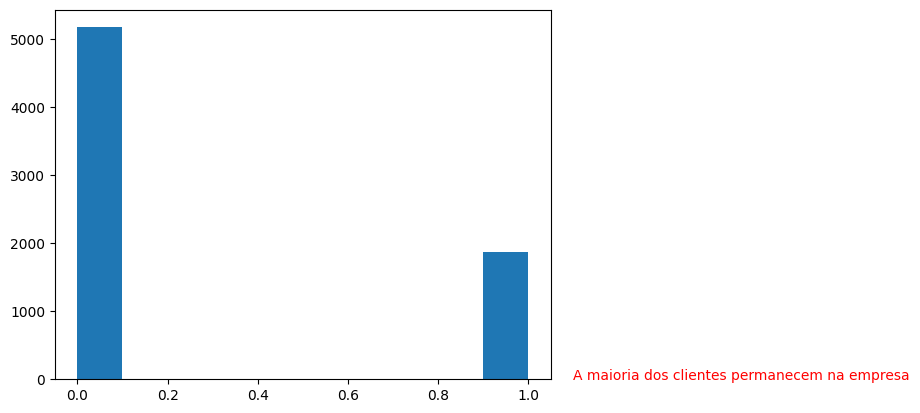

In [22]:
plt.hist(x=df['Churn'])
_ = plt.text(1.1, 0.05, "A maioria dos clientes permanecem na empresa", color='r')

De forma similar ao que fizemos na analise de Tenure, vamos analisar a relação de Churn com algumas variáveis

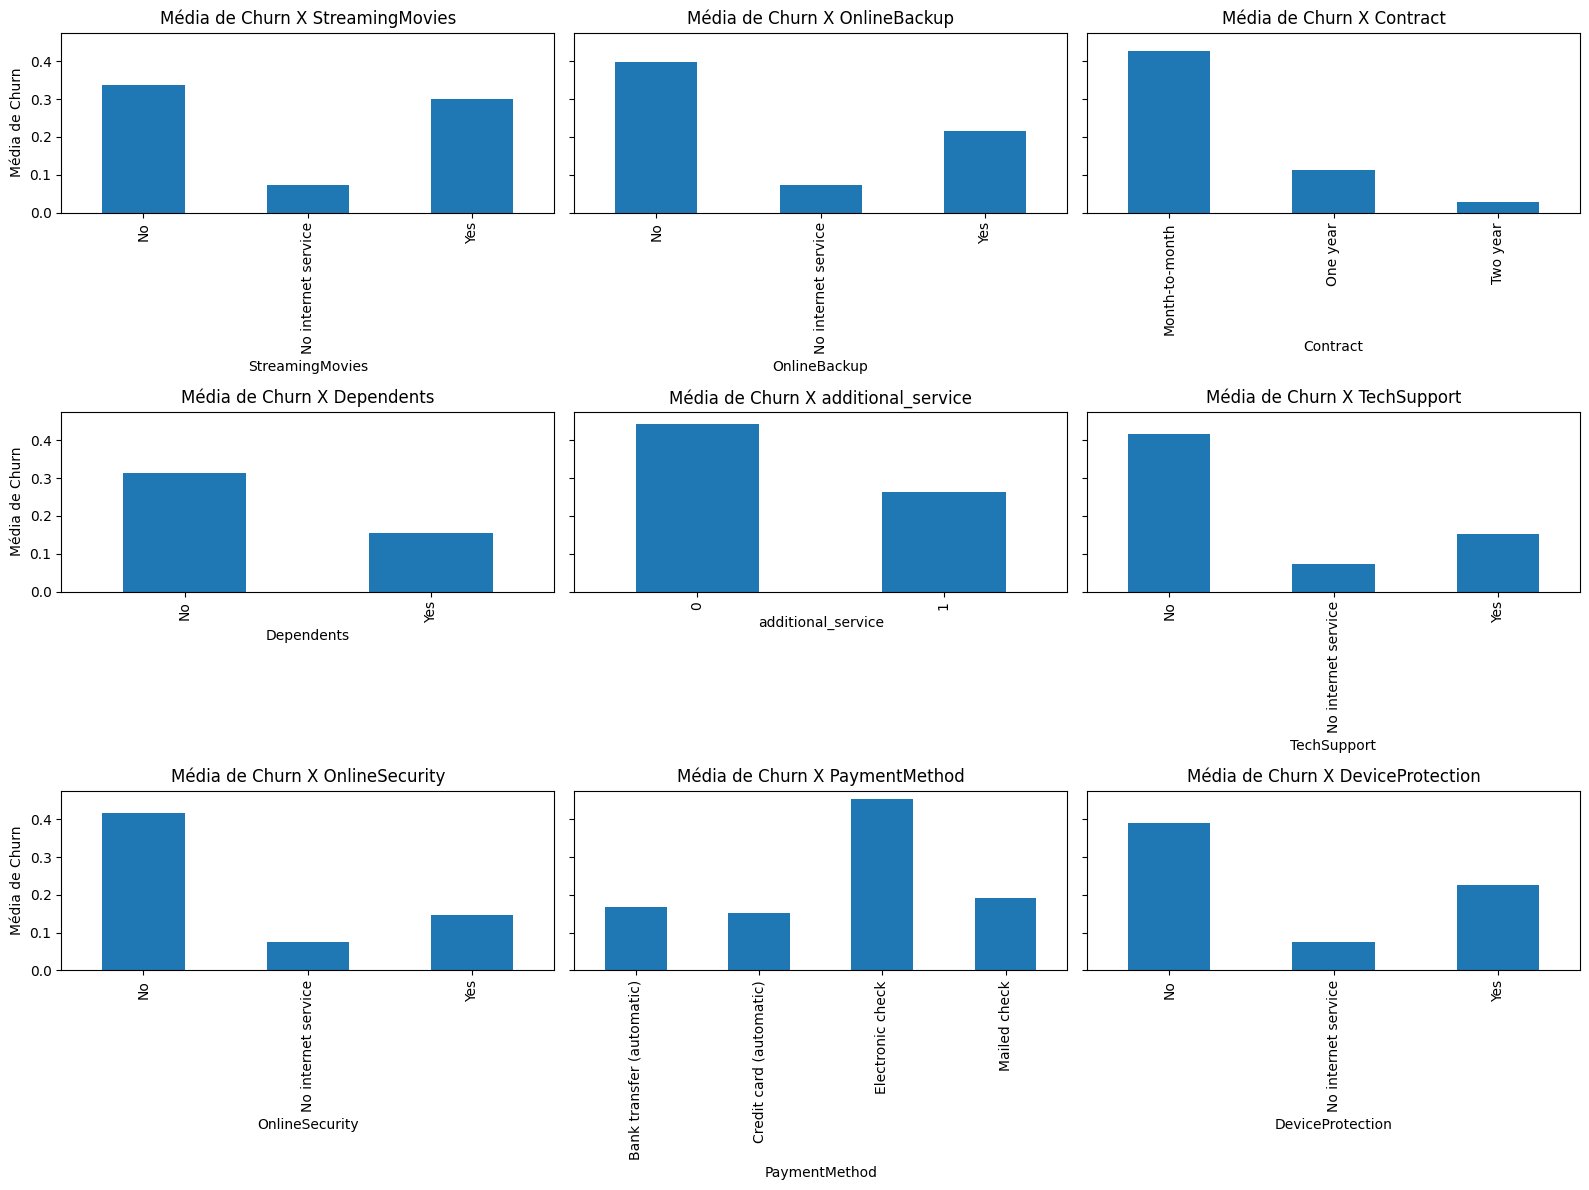

In [23]:
# Aumente a altura dos gráficos
fig, axes = plt.subplots(3, 3, figsize=(16, 12), sharey=True, gridspec_kw={'height_ratios': [3, 3, 3]})

# Lista de colunas de interesse para os subplots
colunas_interesse = ['StreamingMovies', 'OnlineBackup', 'Contract', 'Dependents', 'additional_service', 'TechSupport', 'OnlineSecurity', 'PaymentMethod', 'DeviceProtection']

# Itere pelas colunas de interesse e crie os subplots
for i, coluna in enumerate(colunas_interesse):
    # Calcule as coordenadas do subplot atual
    linha = i // 3
    col = i % 3

    # Calcule a média do churn (agora 0 ou 1) para cada categoria da coluna
    media_churn_por_categoria = df.groupby(coluna)['Churn'].mean()

    # Plote o gráfico de barras no subplot atual
    media_churn_por_categoria.plot(kind='bar', ax=axes[linha, col])
    axes[linha, col].set_title(f'Média de Churn X {coluna}')
    axes[linha, col].set_xlabel(coluna)
    axes[linha, col].set_ylabel('Média de Churn')

# Ajuste o layout
plt.tight_layout()

# Exiba a figura
plt.show()

- Insights obtidos:
- A maior relação que podemos tirar é que os Clientes que optam por não ter serviços de segurança(OnlineSecurity, DeviceProtection, OnlineBackup e TechSupport) são aquelas com maior indice de chrun
- Os Clientes com contrato mensal tem um indice muito mais elevado que os outros tipos de contratos
- Os Clientes sem dependentes tem um indice de chrun ligeiramente maior
- Os Clientes sem serviços adicionais tem um indice de chrun ligeiramente maior
- Clientes que tem como metodo de pagamente o cheque eletronico tem um indice absurdamente maior chrun

Como tivemos um indice fora do comum das pessoas que optam por ter um serviço de segurança, vamos analisar a diferença de chrun das pessoas que possuem ao menos um serviço de segurança e das pessoas que não possuem nenhum

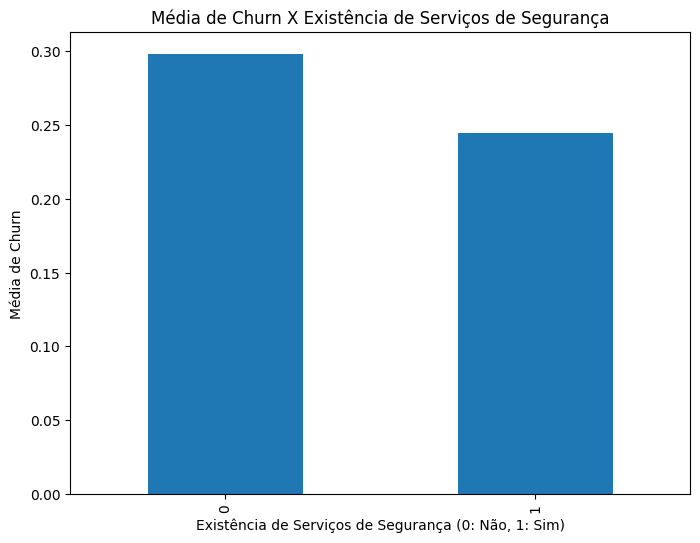

In [24]:
colunas_servicos_adicionais = ['OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'TechSupport']

# Crie uma nova coluna 'additional_security' com base nas colunas especificadas
df['additional_security'] = df[colunas_servicos_adicionais].apply(lambda row: 1 if 'Yes' in row.values else 0, axis=1)

# Crie uma figura com subplots
fig, axes = plt.subplots(figsize=(8, 6))

# Calcule a média do churn para cada categoria da coluna 'additional_security'
media_churn_por_categoria = df.groupby('additional_security')['Churn'].mean()

# Plote o gráfico de barras
media_churn_por_categoria.plot(kind='bar', ax=axes)
axes.set_title('Média de Churn X Existência de Serviços de Segurança')
axes.set_xlabel('Existência de Serviços de Segurança (0: Não, 1: Sim)')
axes.set_ylabel('Média de Churn')

# Exiba o gráfico
plt.show()

Apesar de não ter um resultado tão fora da curva, constatamos que os clientes que não tem nenhum serviço de segurança tem um indice consideravelmente maior comparado aos que não tem

Analisando a relação entre Churn X Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

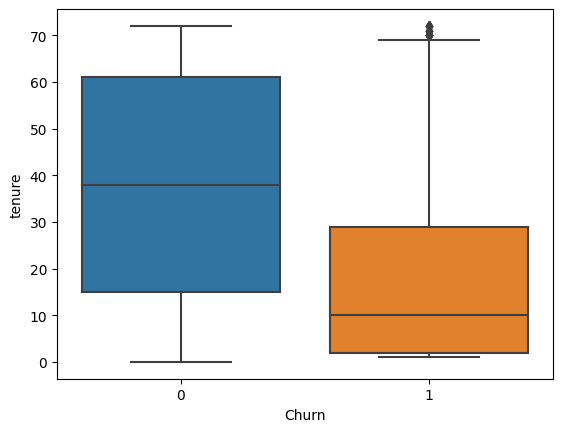

In [25]:
sns.boxplot(data=df, x='Churn', y='tenure')

Há uma diferença gritante na quantidade de meses entre os clientes que dão Churn e aqueles que não o fazem, mostrando que os clientes que o fazem são aqueles que passam pouco tempo na empresa. Talvez isso aconteca por ele não se adaptar ou simplesmente não aprovar o serviço, isso indica que o ideal para a empresa é **fazer um estudo sobre oferecimento de beneficio para membros novos**

Fazendo algumas analises adicionais sobre o indice de Churn

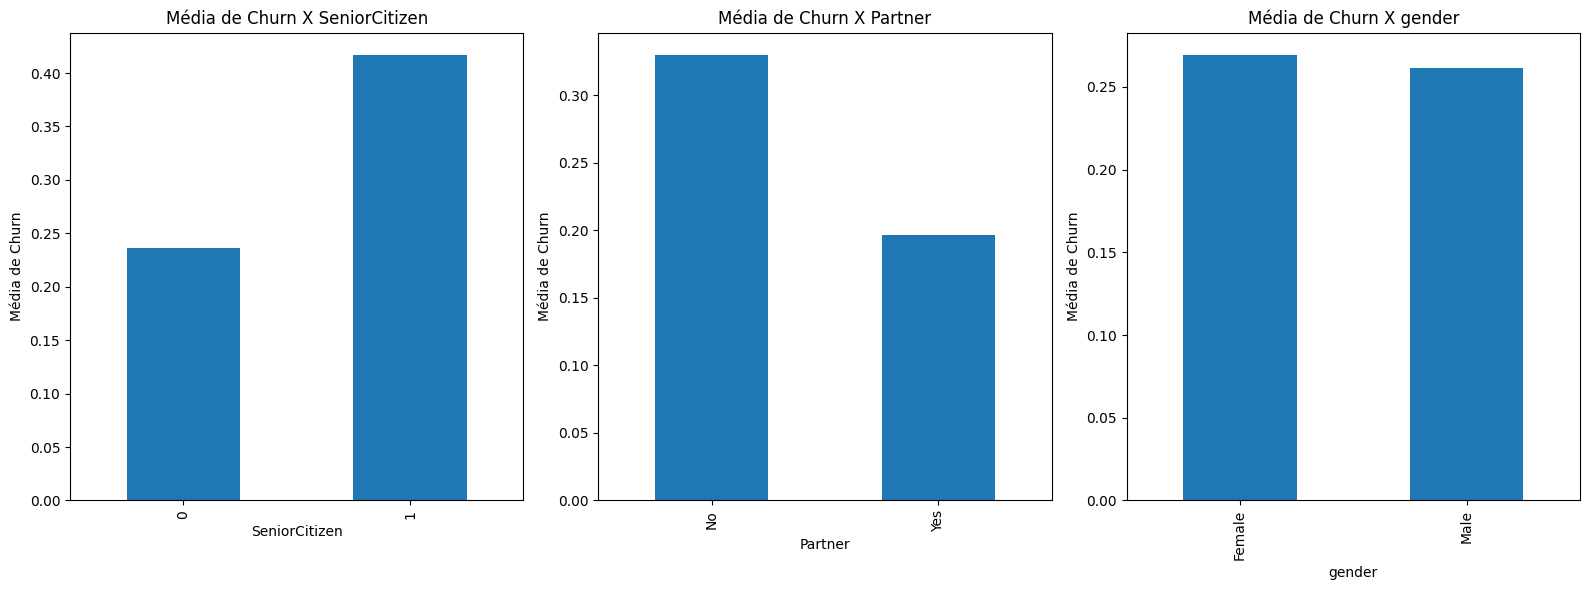

In [26]:
# Aumente a altura dos gráficos
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Lista de colunas de interesse para os subplots
colunas_interesse = ['SeniorCitizen', 'Partner', 'gender']

# Itere pelas colunas de interesse e crie os subplots
for i, coluna in enumerate(colunas_interesse):
    # Calcule as coordenadas do subplot atual
    linha = i

    # Calcule a média do churn (agora 0 ou 1) para cada categoria da coluna
    media_churn_por_categoria = df.groupby(coluna)['Churn'].mean()

    # Plote o gráfico de barras no subplot atual
    media_churn_por_categoria.plot(kind='bar', ax=axes[linha])
    axes[linha].set_title(f'Média de Churn X {coluna}')
    axes[linha].set_xlabel(coluna)
    axes[linha].set_ylabel('Média de Churn')

# Ajuste o layout
plt.tight_layout()

# Exiba a figura
plt.show()

- Idosos tem uma taxa de Churn significativamente maior que o resto dos clientes

## Conclusão

Principais insights tirados sobre o Churn dessa empresa

- Os clientes fazem contratos curtos tem uma taxa absurdamente maior de churn do que aqueles que ficam um tempo maior
- Os clientes com plano mensal tem uma taxa de Churn significativamente maior
- Esses dois perfis de usuário possivelmente representam a parcela dos clientes que fizeram um plano de baixa duração para experimentar a operadora e não gostaram do serviço ou simplesmente não fizeram questão de renovar.
A estratégia mais eficiente para essa empresa provavelmente seria a aplicação de políticas que beneficiam os clientes que fizeram contrato recentemente, especialmente aqueles com uma menor duração, uma vez que é essa a parcela dos clientes que mais dão Churn na empresa.


- Outro perfil de usuário que tem uma taxa de Churn significativa são os idosos. Talvez a operadora não tenha um suporte de fácil adaptação para os mais velhos, que via de regra tem menos intimidade com ferramentas derivadas das novas tecnologias. Seria extremamente válido o estudo de políticas que melhoram a aceitação de usuários com idade mais avançada

- Clientes que não possuem parceiro também tem uma taxa significativamente maior de churn do que aquelas que o possuem, seria interessante uma análise sobre aplicações de benefícios aos planos individuais, uma vez que a maior parte dos clientes que não tem parceiro fazem esse tipo de plano

# Modelando o Preditor

## Dividindo a base em treino e teste

In [27]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,additional_service,additional_security
2711,0431-APWVY,Female,0,Yes,Yes,28,Yes,No,Fiber optic,No,...,Yes,Yes,One year,Yes,Bank transfer (automatic),90.10,2598.95,1,1,0
5707,4537-DKTAL,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,Month-to-month,No,Electronic check,45.55,84.4,0,1,0
3995,0618-XWMSS,Male,0,No,Yes,28,Yes,No,Fiber optic,Yes,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.90,2068.55,1,1,1
2986,1303-SRDOK,Female,0,Yes,Yes,55,Yes,No,Fiber optic,No,...,No,No,Two year,Yes,Credit card (automatic),69.05,3842.6,0,1,0
3068,1810-BOHSY,Male,0,Yes,No,51,Yes,Yes,Fiber optic,Yes,...,No,Yes,One year,Yes,Credit card (automatic),96.40,4911.05,0,1,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   SeniorCitizen        7043 non-null   int64  
 3   Partner              7043 non-null   object 
 4   Dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   PhoneService         7043 non-null   object 
 7   MultipleLines        7043 non-null   object 
 8   InternetService      7043 non-null   object 
 9   OnlineSecurity       7043 non-null   object 
 10  OnlineBackup         7043 non-null   object 
 11  DeviceProtection     7043 non-null   object 
 12  TechSupport          7043 non-null   object 
 13  StreamingTV          7043 non-null   object 
 14  StreamingMovies      7043 non-null   object 
 15  Contract             7043 non-null   o

In [29]:
df.nunique().sort_values()

additional_security       2
gender                    2
SeniorCitizen             2
Partner                   2
Dependents                2
Churn                     2
PhoneService              2
PaperlessBilling          2
additional_service        2
Contract                  3
StreamingMovies           3
StreamingTV               3
DeviceProtection          3
OnlineBackup              3
OnlineSecurity            3
InternetService           3
MultipleLines             3
TechSupport               3
PaymentMethod             4
tenure                   73
MonthlyCharges         1585
TotalCharges           6531
customerID             7043
dtype: int64

Precisamos transformar as variaveis categoricas em numericas

In [30]:
categoricas = ['gender','Partner','Dependents','PhoneService', 'PaperlessBilling', 'Contract', 'StreamingMovies', 'StreamingTV', 'DeviceProtection', 'OnlineBackup','OnlineSecurity','InternetService','MultipleLines', 'TechSupport','PaymentMethod']
encoder = OrdinalEncoder()
for cat in categoricas:
  df[cat] = encoder.fit_transform(df[[cat]])
df.sample(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,additional_service,additional_security
2624,0820-FNRNX,1.0,0,1.0,1.0,17,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,66.70,1077.05,0,1,1
5945,8421-WZOOW,0.0,1,1.0,1.0,57,1.0,0.0,1.0,0.0,...,2.0,0.0,0.0,1.0,1.0,95.30,5567.45,0,1,1
2118,9779-DPNEJ,0.0,0,1.0,1.0,22,1.0,0.0,1.0,0.0,...,0.0,2.0,0.0,1.0,2.0,80.15,1790.65,0,1,0
817,0036-IHMOT,0.0,0,1.0,1.0,55,1.0,0.0,1.0,0.0,...,2.0,2.0,1.0,1.0,0.0,103.70,5656.75,0,1,1
3896,8590-OHDIW,0.0,0,1.0,1.0,38,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,0.0,3.0,20.30,749.35,0,1,0
5828,0402-OAMEN,0.0,0,1.0,1.0,72,1.0,2.0,2.0,1.0,...,1.0,1.0,2.0,0.0,0.0,24.45,1709.1,0,1,0


In [31]:
df.shape

(7043, 23)

- A coluna TotalCharges está sendo indicada como object, apesar de ser um float, vamos converte-la
- Ao tentar converte-la percebi que tem valores como string vazia ' ', vamos substituilos

In [32]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Converta a coluna para float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Preencha os NaN com a média da coluna
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

Dividindo entre variaveis previsoras e target

In [33]:
y = df['Churn']
X = df.drop(['customerID', 'Churn'], axis=1) # Não vamos usar customerID para as previsoes

Dividindo a base em treino e teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [35]:
X_train.shape, X_test.shape

((5986, 21), (1057, 21))

In [36]:
y_train.shape, y_test.shape

((5986,), (1057,))

## Modelagem Preliminar
Primeiramente vamos analisar quais os modelos que se comportam melhor como base model, sem a aplicação de nenhuma melhoria à base de dados

Para cada modelo que desejamos testar, aplicaremos um codigo que vai retornar o resultado do F1 e accuracia para os melhores parametros, colocamos F1 como metrica que determinará se um parametro é melhor ou pior que os outros, visto que para caso como esse, em que Falsos negativos são criticos, escolher os melhores modelos com base nessa metrica é o ideal

### Random Forest
- acc: 0.87
- F1: 0.57

In [ ]:
parametros = {
    'n_estimators': [10, 40, 100, 150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

rf = RandomForestClassifier()

# Usaremos o StratifiedKFold para preservar a distribuição das classes durante a validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Usaremos GridSearchCV para pegar o resultado dos melhores parametros
grid_search = GridSearchCV(estimator=rf, param_grid=parametros, scoring='f1', cv=cv, n_jobs=-1)

# Ajuste o grid search aos seus dados
grid_search.fit(X, y)

# Obtenha os melhores parâmetros e o melhor resultado
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
melhor_modelo = grid_search.best_estimator_
# Faça previsões com o melhor modelo
y_pred = melhor_modelo.predict(X_test)

# Calcule a acurácia das previsões
acuracia = accuracy_score(y_test, y_pred)

print("Melhores Parâmetros:", melhores_parametros)
print("Melhor Resultado (F1-score):", melhor_resultado)
print("Acurácia do Melhor Modelo:", acuracia)

Melhores Parâmetros: {'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}
Melhor Resultado (F1-score): 0.5760696612264777
Acurácia do Melhor Modelo: 0.8760643330179754


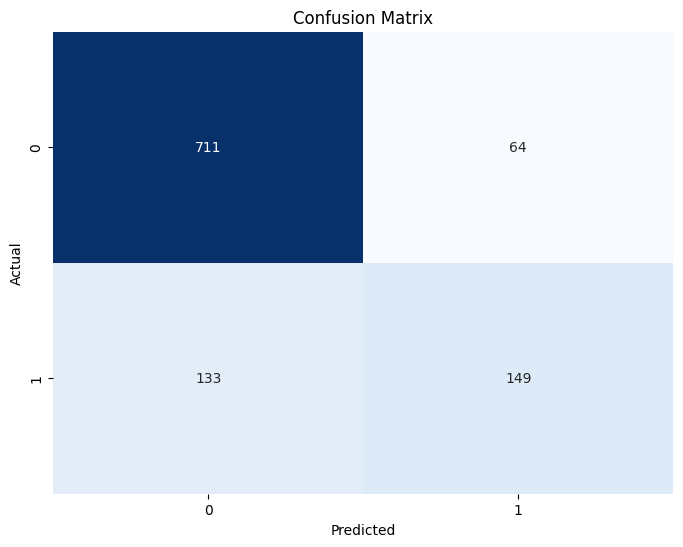

In [ ]:
parametros = {
    'criterion': 'gini',
    'min_samples_leaf': 5,
    'min_samples_split': 2,
    'n_estimators': 150
}
rf = RandomForestClassifier(**parametros)

# Ajuste o modelo aos dados de treinamento
rf.fit(X_train, y_train)

# Faça previsões
y_pred = rf.predict(X_test)
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Apesar de uma acuracia aparentemente bom, a matiz de confusão está pessima para prever o Churn

### Naive bayes
- acc: 0.76
- F1: 0.61

In [ ]:
parametros = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.2, 0.8]]  # Probabilidades a priori das classes
}


nb = GaussianNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=nb, param_grid=parametros, scoring='f1', cv=cv, n_jobs=-1)

grid_search.fit(X, y)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
melhor_modelo = grid_search.best_estimator_

y_pred = melhor_modelo.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)

print("Melhores Parâmetros:", melhores_parametros)
print("Melhor Resultado (F1-score):", melhor_resultado)
print("Acurácia do Melhor Modelo:", acuracia)

Melhores Parâmetros: {'priors': None, 'var_smoothing': 1e-09}
Melhor Resultado (F1-score): 0.6119057336368723
Acurácia do Melhor Modelo: 0.7663197729422895


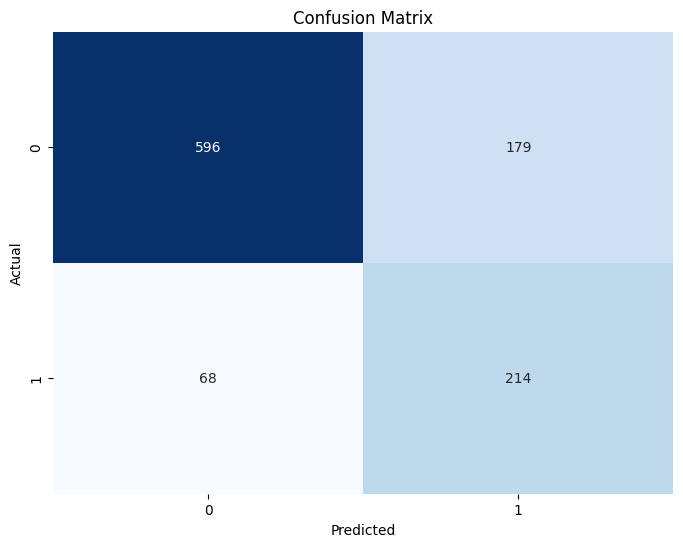

In [ ]:
parametros = {'priors': None, 'var_smoothing': 1e-09}

nb = GaussianNB(**parametros)
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Apesar a acuracia menor, o modelo preveu bem melhor o Churn, mas um pouco pior o  caso contrario

### Redes neurais
- acc: 0.59
- F1: 0.58

In [ ]:
parametros = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
}

mlp = MLPClassifier(random_state=0)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=mlp, param_grid=parametros, scoring='f1', cv=cv, n_jobs=-1)

grid_search.fit(X, y)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
melhor_modelo = grid_search.best_estimator_

# previsões com o melhor modelo
y_pred = melhor_modelo.predict(X_test)
# acurácia das previsões
acuracia = accuracy_score(y_test, y_pred)

print("Melhores Parâmetros:", melhores_parametros)
print("Melhor Resultado (F1-score):", melhor_resultado)
print("Acurácia do Melhor Modelo:", acuracia)

Melhores Parâmetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
Melhor Resultado (F1-score): 0.5849816250062772
Acurácia do Melhor Modelo: 0.5941343424787133


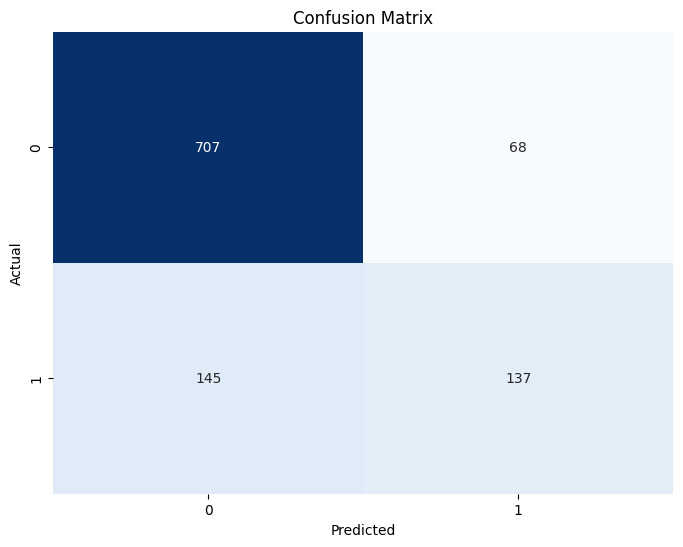

In [ ]:
parametros = {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}

mlp = MLPClassifier(**parametros)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### XGB
- acc: 0.83
- F1: 0.58

In [ ]:
parametros = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}


gb = GradientBoostingClassifier(random_state=0)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=gb, param_grid=parametros, scoring='f1', cv=cv, n_jobs=-1)


grid_search.fit(X, y)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
melhor_modelo = grid_search.best_estimator_

# previsões com o melhor modelo
y_pred = melhor_modelo.predict(X_test)

# acurácia das previsões
acuracia = accuracy_score(y_test, y_pred)

print("Melhores Parâmetros:", melhores_parametros)
print("Melhor Resultado (F1-score):", melhor_resultado)
print("Acurácia do Melhor Modelo:", acuracia)

Melhores Parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Melhor Resultado (F1-score): 0.5843582790426199
Acurácia do Melhor Modelo: 0.8353831598864712


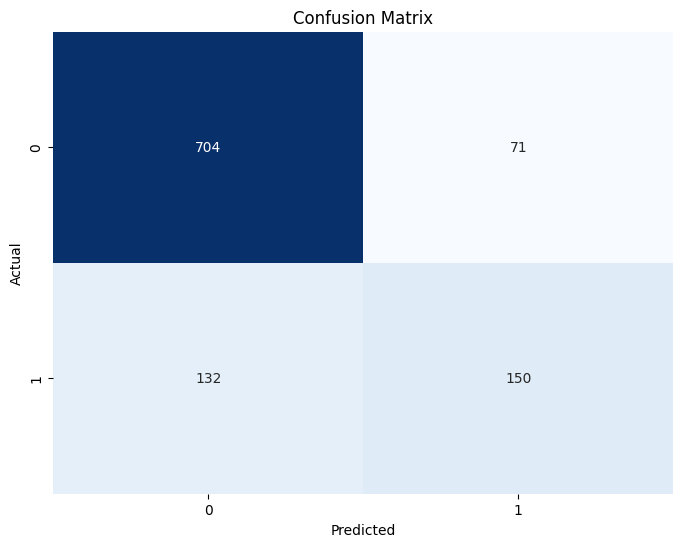

In [ ]:
parametros = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}

gb = GradientBoostingClassifier(**parametros)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNN
- acc: 0.83
- F1: 0.51

In [ ]:
parametros = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],  # 1 para distância Manhattan, 2 para distância Euclidiana
}

# Crie um objeto KNeighborsClassifier
knn = KNeighborsClassifier()

# Use StratifiedKFold para preservar a distribuição das classes durante a validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Crie um objeto GridSearchCV com a métrica F1-score
grid_search = GridSearchCV(estimator=knn, param_grid=parametros, scoring='f1', cv=cv, n_jobs=-1)

# Ajuste o grid search aos seus dados
grid_search.fit(X, y)

# Obtenha os melhores parâmetros e o melhor resultado
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
melhor_modelo = grid_search.best_estimator_

# Faça previsões com o melhor modelo
y_pred = melhor_modelo.predict(X_test)

# Calcule a acurácia das previsões
acuracia = accuracy_score(y_test, y_pred)

print("Melhores Parâmetros:", melhores_parametros)
print("Melhor Resultado (F1-score):", melhor_resultado)
print("Acurácia do Melhor Modelo:", acuracia)

Melhores Parâmetros: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Melhor Resultado (F1-score): 0.5166783663670256
Acurácia do Melhor Modelo: 0.8334910122989593


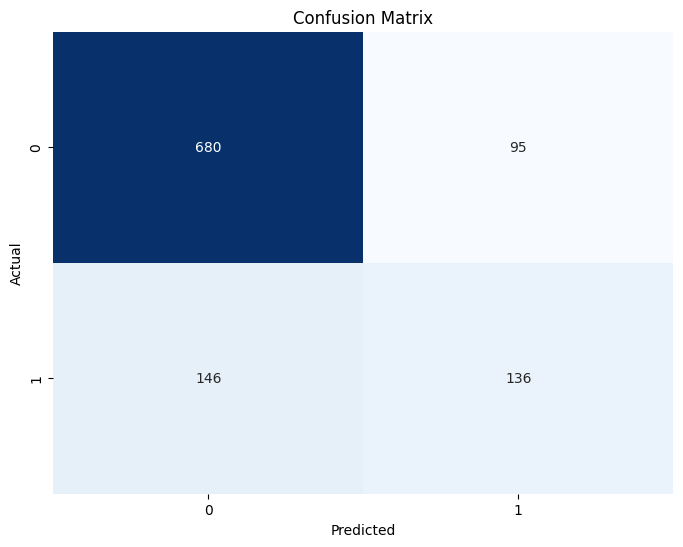

In [ ]:
parametros = {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

knn = KNeighborsClassifier(**parametros)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Regressão logistica
- acc: 0.82
- F1: 0.60

In [ ]:
parametros = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
}

logistic_regression = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=parametros, scoring='f1', cv=cv, n_jobs=-1)

grid_search.fit(X, y)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
melhor_modelo = grid_search.best_estimator_

# Faça previsões com o melhor modelo
y_pred = melhor_modelo.predict(X_test)

# Calcule a acurácia das previsões
acuracia = accuracy_score(y_test, y_pred)

print("Melhores Parâmetros:", melhores_parametros)
print("Melhor Resultado (F1-score):", melhor_resultado)
print("Acurácia do Melhor Modelo:", acuracia)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Melhores Parâmetros: {'C': 10.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Melhor Resultado (F1-score): 0.6004683657009897
Acurácia do Melhor Modelo: 0.8202459791863765


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


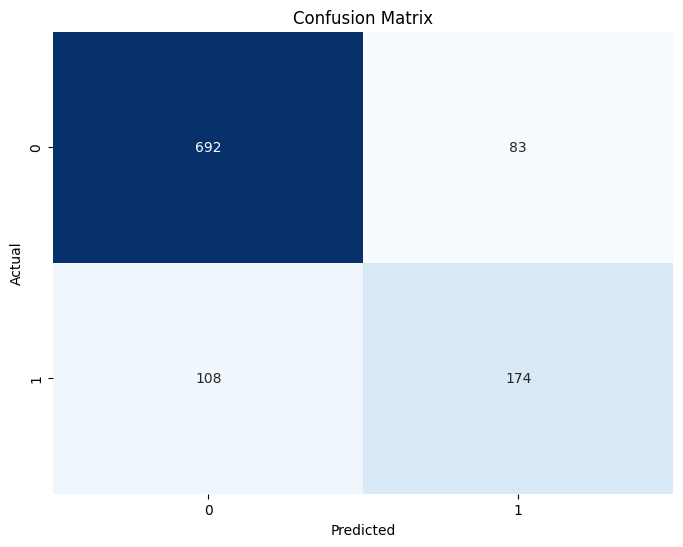

In [ ]:
parametros = {'C': 10.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
logistic_regression = LogisticRegression(**parametros)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Com isso, chegamos a conclusão que os 3 modelos escolhidos para construção modelo final são:

- Random Forest
- Naive bayes
- Regressão logistica

Antes de realmente utilizados na construção do modelo final, vamos tentar otimiza-los com as seguintes estratégias:

- Escalonar os dados
- Analisar as Correlações  
- Analisar as Features importences
- Retirada de outliers
- Dados desbalanceados

Por fim, vamos juntar os 3 modelos pra tentar ter uma eficiencia maior

## Otimizando os modelos
Melhorando os modelos escolhidos na modelagem preliminar

### Random Forest

Resultado inicial:
- Melhor Resultado (F1-score): 0.5760696612264777
- Acurácia do Melhor Modelo: 0.8760643330179754

In [37]:
# Vamos usar esse codigo para testar os resultados sem repetir muito codigo
def testar_melhoria_rf(X_train, X_test, y_train, y_test):
  parametros = {
      'criterion': 'gini',
      'min_samples_leaf': 5,
      'min_samples_split': 2,
      'n_estimators': 150
  }
  rf = RandomForestClassifier(**parametros)

  # Ajuste o modelo aos dados de treinamento
  rf.fit(X_train, y_train)

  # Faça previsões
  y_pred = rf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'melhoria da accuracy: {accuracy - 0.8760643330179754}')
  print(f'melhoria do f1: {f1 - 0.5760696612264777}')
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Exibe a matriz de confusão usando um heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

#### Analisando correlações entre features

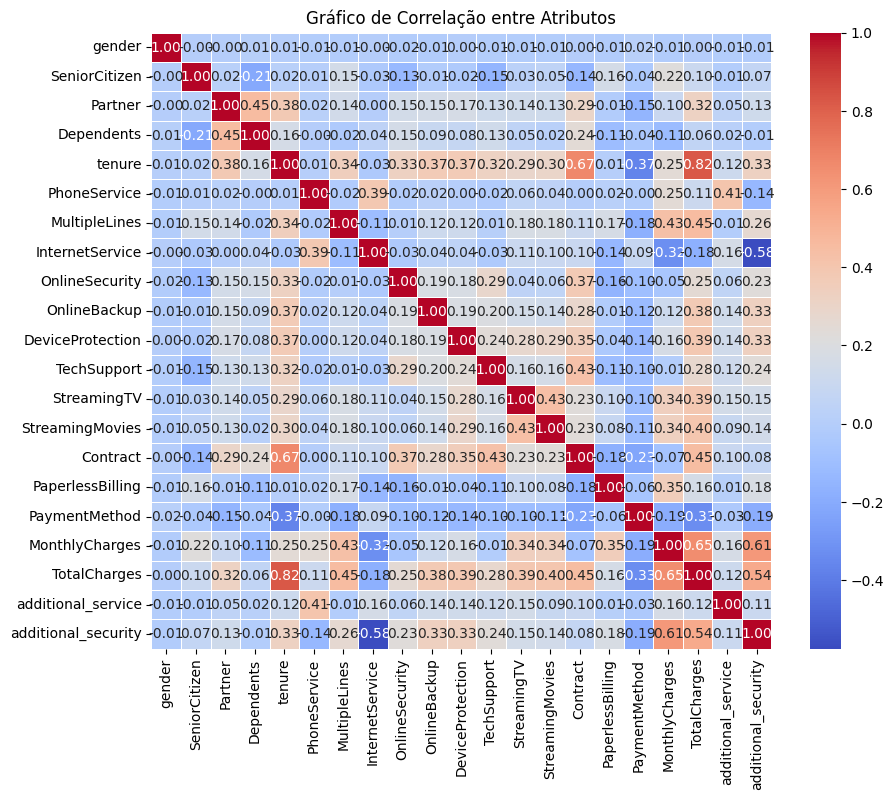

In [38]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Gráfico de Correlação entre Atributos")
plt.show()

As correlações mais fortes são:
- tenure X Contract
- tenure X TotalCharges

Vamos fazer alguns testes tirando alguns desses atributos e analisar como o modelo se comporta

melhoria da accuracy: -0.06811731315042568
melhoria do f1: 0.012165632891169342


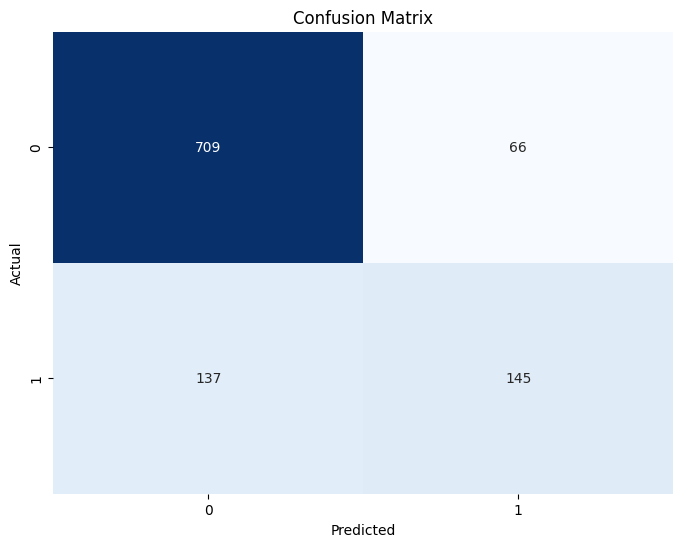

In [39]:
# Retirando tenure
X_train_NoTenure = X_train.drop(columns=['tenure'])
X_test_NoTenure = X_test.drop(columns=['tenure'])

testar_melhoria_rf(X_train_NoTenure, X_test_NoTenure, y_train, y_test)

Não tivemos bons resultados

melhoria da accuracy: -0.07473982970671711
melhoria do f1: -0.008168426658576422


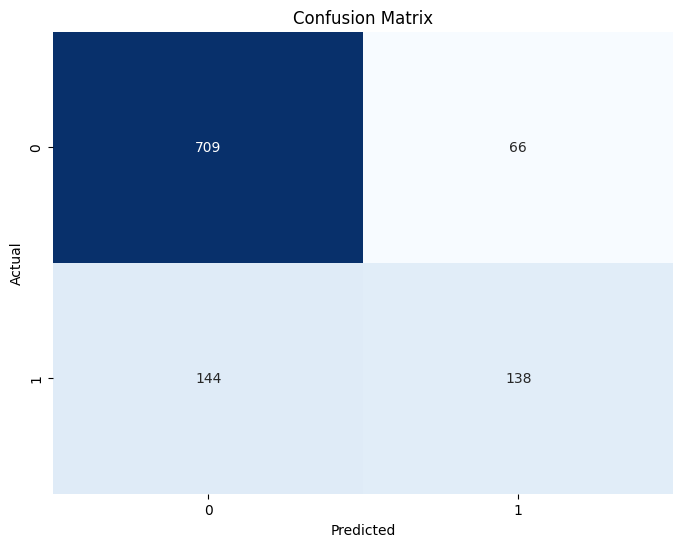

In [40]:
# Retirando Contract
X_train_NoTenure = X_train.drop(columns=['TotalCharges', 'Contract'])
X_test_NoTenure = X_test.drop(columns=['TotalCharges', 'Contract'])

testar_melhoria_rf(X_train_NoTenure, X_test_NoTenure, y_train, y_test)

**NÃO** tivemos um resultado satisfatorio com essa otimização

#### Analisar as Features importences

In [41]:
parametros = {
    'criterion': 'gini',
    'min_samples_leaf': 5,
    'min_samples_split': 2,
    'n_estimators': 150
}
rf = RandomForestClassifier(**parametros)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordene o DataFrame por importância em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exiba o DataFrame para visualizar as importâncias das features
print(feature_importance_df)

                Feature  Importance
4                tenure    0.165627
18         TotalCharges    0.149572
14             Contract    0.139705
17       MonthlyCharges    0.135318
11          TechSupport    0.062973
8        OnlineSecurity    0.062722
7       InternetService    0.045197
16        PaymentMethod    0.037357
9          OnlineBackup    0.029814
10     DeviceProtection    0.023914
15     PaperlessBilling    0.021279
20  additional_security    0.019458
6         MultipleLines    0.019320
0                gender    0.016855
2               Partner    0.014137
13      StreamingMovies    0.013968
12          StreamingTV    0.013358
1         SeniorCitizen    0.013122
3            Dependents    0.010499
5          PhoneService    0.004547
19   additional_service    0.001260


melhoria da accuracy: -0.07379375591296122
melhoria do f1: -0.0034725242121628197


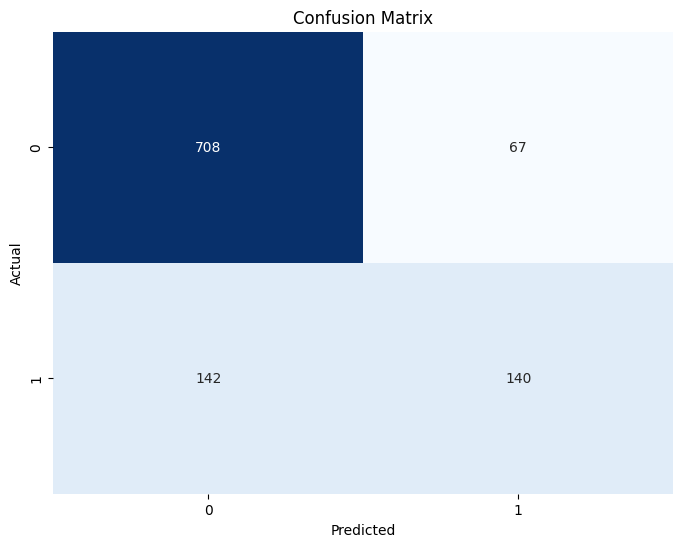

In [42]:
# Retirando PhoneService e additional_service com importancia minima para o modelo
# Retirando Contract
X_train_Importances = X_train.drop(columns=['PhoneService', 'additional_service'])
X_test_Importances = X_test.drop(columns=['PhoneService', 'additional_service'])

testar_melhoria_rf(X_train_Importances, X_test_Importances, y_train, y_test)

Também não tivemos um resultado minimamente satisfatório

#### Retirando outliers

In [43]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Criando boxplots interativos usando plotly
for col in columns:
    fig = px.box(df, y=col, title=f'Boxplot of {col}')
    fig.show()

Não há outliers nas 3 colunas numéricas

#### Dados desbalanceados

Como na nossa base de dados, existem muito mais registros de pessoas que não dão churn, talvez cortar um pouco desses registros melhore o modelo, existem duas formas de fazer isso:

1: Subamostragem com Tomek Links

melhoria da accuracy: -0.0671712393566698
melhoria do f1: 0.004843201844061729


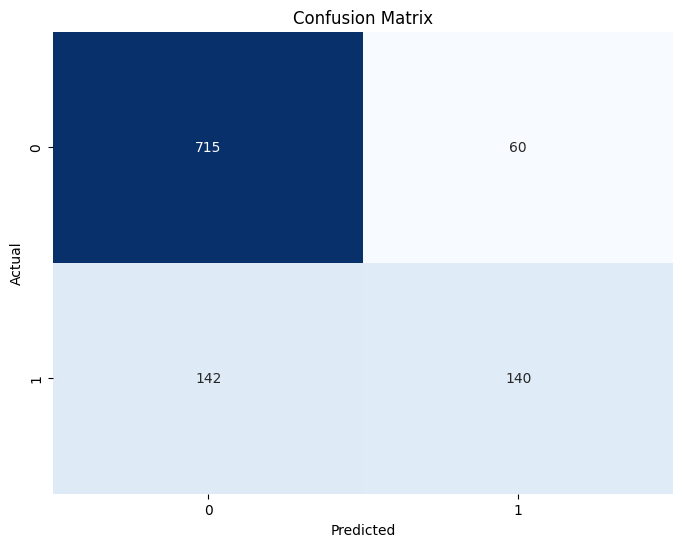

In [44]:
tl = TomekLinks(sampling_strategy='all') # Balanceamento considerando a classe com mais registros
X_under, y_under = tl.fit_resample(X_train, y_train)

testar_melhoria_rf(X_under, X_test, y_under, y_test)

02. Sobreamostragem com SMOTE

melhoria da accuracy: -0.07379375591296122
melhoria do f1: 0.05138131916567912


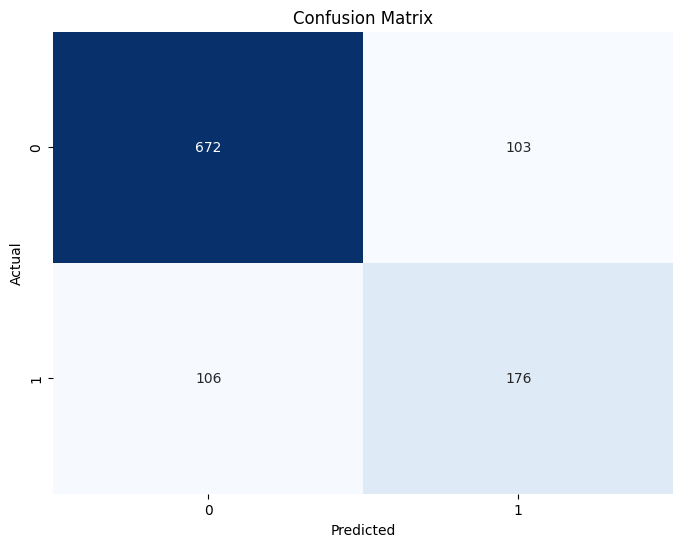

In [45]:
smote = SMOTE(sampling_strategy='minority') # Vai fazer o balanceamento apenas para a classe com menos registros
X_over, y_over = smote.fit_resample(X_train, y_train)

testar_melhoria_rf(X_over, X_test, y_over, y_test)

Apesar de não conseguir uma melhoria tão significativa nas metricas, ao analisar a matriz de confusão, podemos perceber que houve uma melhora significativa na previsão da variavel churn, que era o maior problema que os modelos estavam enfrentando, logo, podemos considerar a aplicação do SMOTE como um **sucesso**

#### Salvando o melhor modelo de random fortest

As unicas alterações que melhoraram consideralvelmente foi ajustar a distribuição dos valores de churn = 1 usando o SMOTE

melhoria da accuracy: -0.07284768211920523
melhoria do f1: 0.055136012532387535


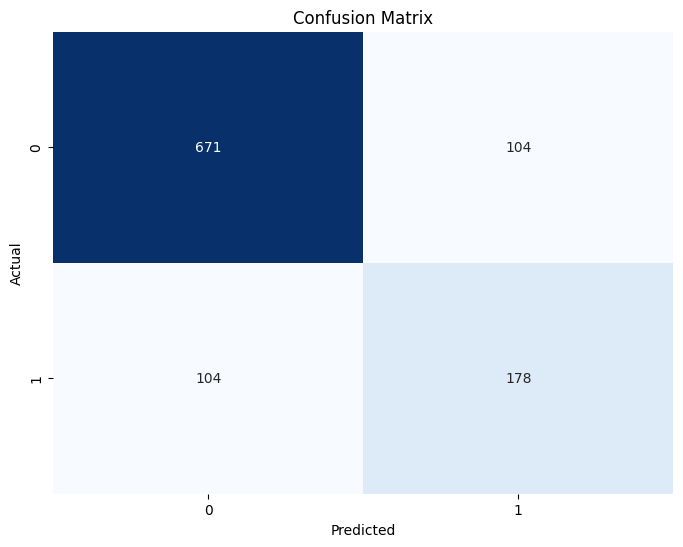

RandomForestClassifier(min_samples_leaf=5, n_estimators=150)

In [78]:
# Registrando o melhor modelo de random fortest
parametros = {
      'criterion': 'gini',
      'min_samples_leaf': 5,
      'min_samples_split': 2,
      'n_estimators': 150
  }

best_rf = RandomForestClassifier(**parametros)

# Ajuste o modelo aos dados de treinamento
testar_melhoria_rf(X_over, X_test, y_over, y_test)
best_rf.fit(X_over, y_over)

### Naive Bayes

In [50]:
# Vamos usar esse codigo para testar os resultados sem repetir muito codigo
def testar_melhoria_nb(X_train, X_test, y_train, y_test):
  parametros = {'priors': None, 'var_smoothing': 1e-09}
  nb = GaussianNB(**parametros)

  # Ajuste o modelo aos dados de treinamento
  nb.fit(X_train, y_train)

  # Faça previsões
  y_pred = nb.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'melhoria da accuracy: {accuracy - 0.7663197729422895}')
  print(f'melhoria do f1: {f1 - 0.6119057336368723}')
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Exibe a matriz de confusão usando um heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

#### Analisando correlações entre features

Já vimos anteriormente quais são as colunas que estão com uma alta correlação, vamos testar como o naive bayes se comporta quanto a isso

melhoria da accuracy: 0.0037842951750236553
melhoria do f1: 0.02486556681155827


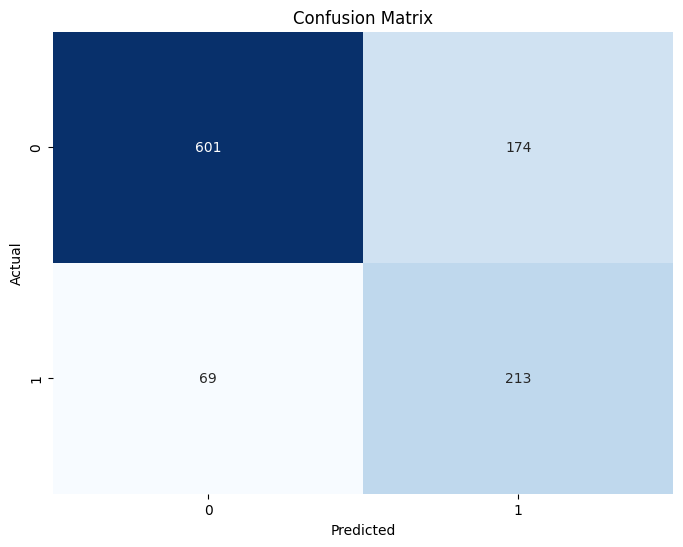

In [51]:
# Retirando tenure
X_train_NoTenure = X_train.drop(columns=['tenure'])
X_test_NoTenure = X_test.drop(columns=['tenure'])

testar_melhoria_nb(X_train_NoTenure, X_test_NoTenure, y_train, y_test)

melhoria da accuracy: 0.011352885525070966
melhoria do f1: 0.03471080771651125


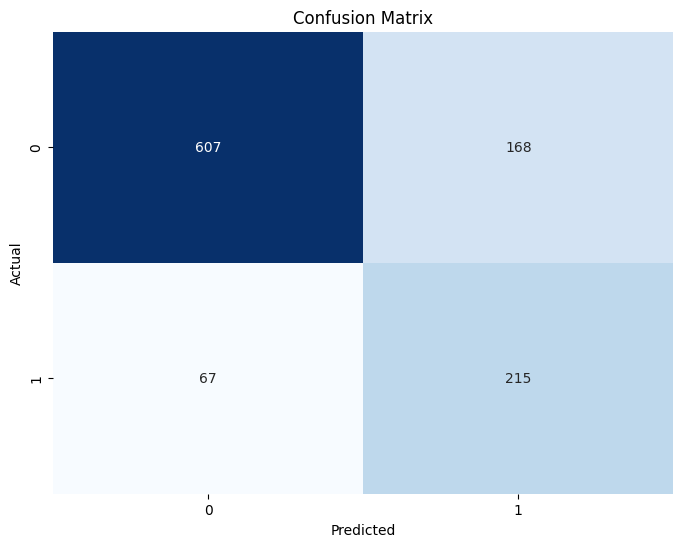

In [55]:
# Retirando Contract
X_train_NoTenure = X_train.drop(columns=['TotalCharges'])
X_test_NoTenure = X_test.drop(columns=['TotalCharges'])

testar_melhoria_nb(X_train_NoTenure, X_test_NoTenure, y_train, y_test)

Apesar de uma pequena melhora, ao retirar a coluna TotalChanges conseguimos uma pequena melhora tanto no Churn positivo quanto para o negativo

#### Dados desbalanceados

Ja fizemos os novos dfs com a diferenã entre a quantidade de Churn = 0 e 1 é minimazada, usando duas estratégias diferentes, vamos testar essas duas para o naive beyes

melhoria da accuracy: 0.0037842951750236553
melhoria do f1: 0.02486556681155827


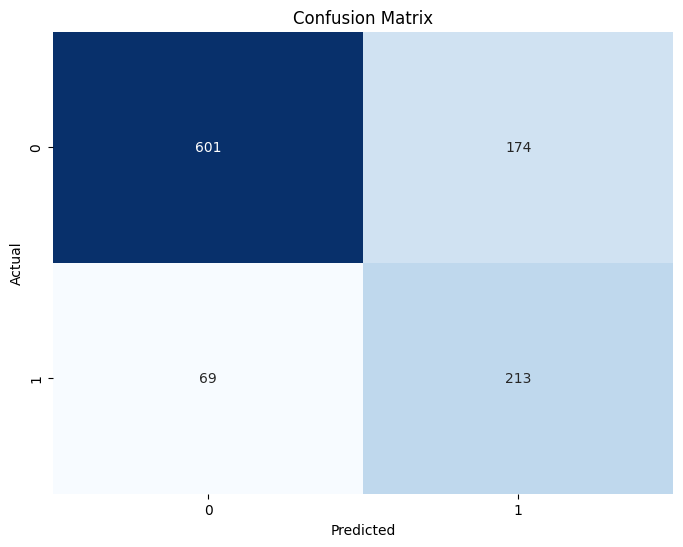

In [57]:
testar_melhoria_nb(X_under, X_test, y_under, y_test)

melhoria da accuracy: -0.014191106906338624
melhoria do f1: 0.014874893143754564


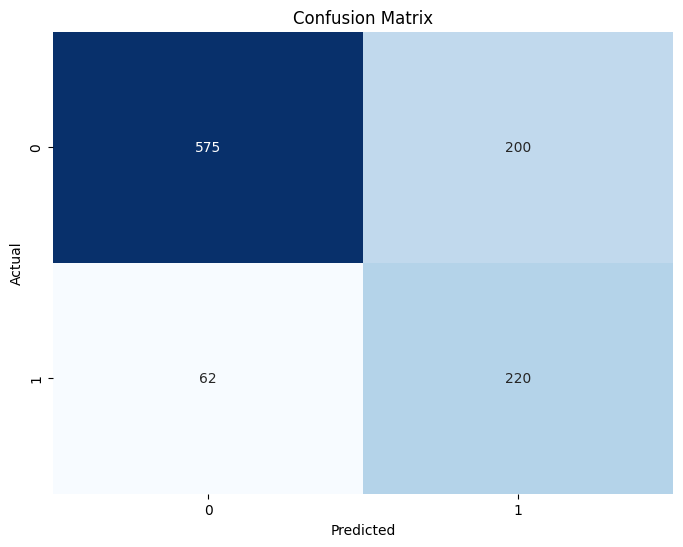

In [59]:
testar_melhoria_nb(X_over, X_test, y_over, y_test)

Apesar do segundo modelo(usando SMOTE) ter tido uma acuracia menor, é perceptivel que ele melhorou a acuracia para os registros que tem Churn = 1, o que é prioridade nesse projeto, fazendo com que a abordagem SMOTE seja considerada um sucesso para naive bayes


#### Escalonando os dados


melhoria da accuracy: 0.008514664143803197
melhoria do f1: 0.028577650048928316


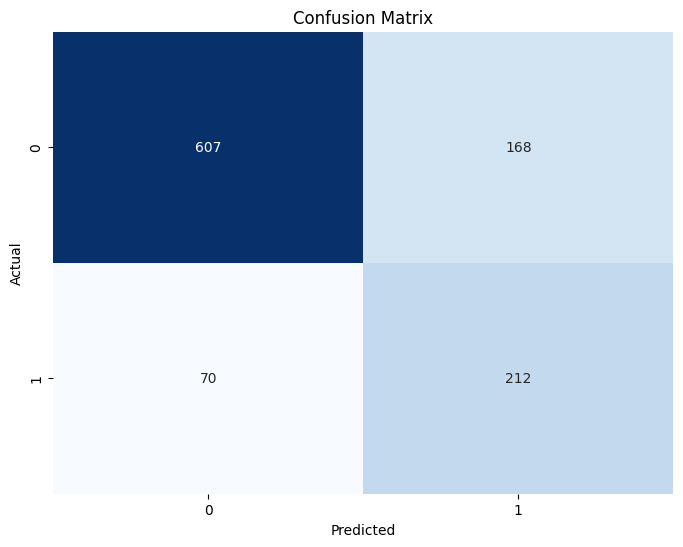

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

testar_melhoria_nb(X_train_scaled, X_test_scaled, y_train, y_test)

Foi eficiente para analisar o Churn = 0, mas piorou o Churn = 1, Logo, não foi eficiente para esse projeto

#### Salvando o melhor modelo de naive bayes

As alterações que tiverem um efeito positivo no NB foram: retirar a coluna TotalCharges e usar o SMOTE para balancear a base de dados

melhoria da accuracy: -0.010406811731314969
melhoria do f1: 0.02161699363585501


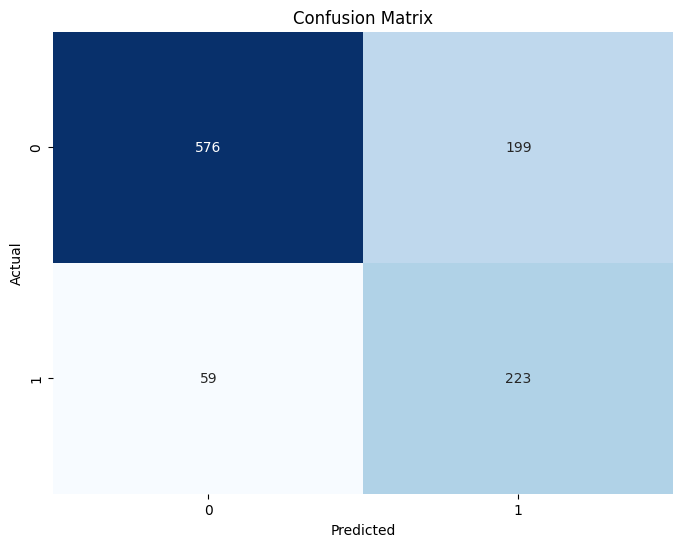

GaussianNB()

In [64]:
# Registrando o melhor modelo de random fortest
parametros = {'priors': None, 'var_smoothing': 1e-09}

best_nb = GaussianNB(**parametros)

X_train_NoTC = X_train.drop(columns=['TotalCharges'])
X_test_NoTC = X_test.drop(columns=['TotalCharges'])

smote = SMOTE(sampling_strategy='minority') # Vai fazer o balanceamento apenas para a classe com menos registros
X_over_NOTC, y_over_NOTC = smote.fit_resample(X_train_NoTC, y_train)

testar_melhoria_nb(X_over_NOTC, X_test_NoTC, y_over_NOTC, y_test)
# Ajuste o modelo aos dados de treinamento
best_nb.fit(X_over_NOTC, y_over_NOTC)

Foi uma melhoria significativa na predição do Churn = 1

### Regressão logistica

In [65]:
# Vamos usar esse codigo para testar os resultados sem repetir muito codigo
def testar_melhoria_rl(X_train, X_test, y_train, y_test):
  parametros = {'C': 10.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
  rl = LogisticRegression(**parametros)

  # Ajuste o modelo aos dados de treinamento
  rl.fit(X_train, y_train)

  # Faça previsões
  y_pred = rl.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'melhoria da accuracy: {accuracy - 0.8202459791863765}')
  print(f'melhoria do f1: {f1 - 0.6004683657009897}')
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Exibe a matriz de confusão usando um heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

#### Analisando correlações entre features

melhoria da accuracy: -0.007568590350047311
melhoria do f1: 0.03150189452205865


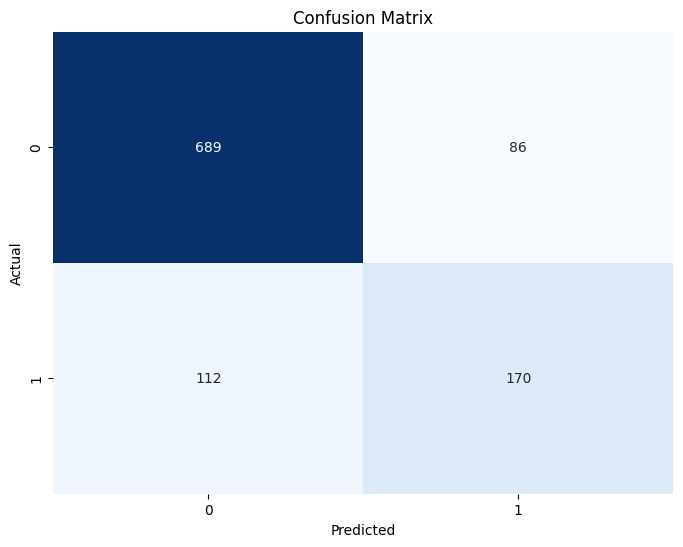

In [66]:
# Retirando tenure
X_train_NoTenure = X_train.drop(columns=['tenure'])
X_test_NoTenure = X_test.drop(columns=['tenure'])

testar_melhoria_rl(X_train_NoTenure, X_test_NoTenure, y_train, y_test)

melhoria da accuracy: 0.0009460737937558861
melhoria do f1: 0.04089785820792868


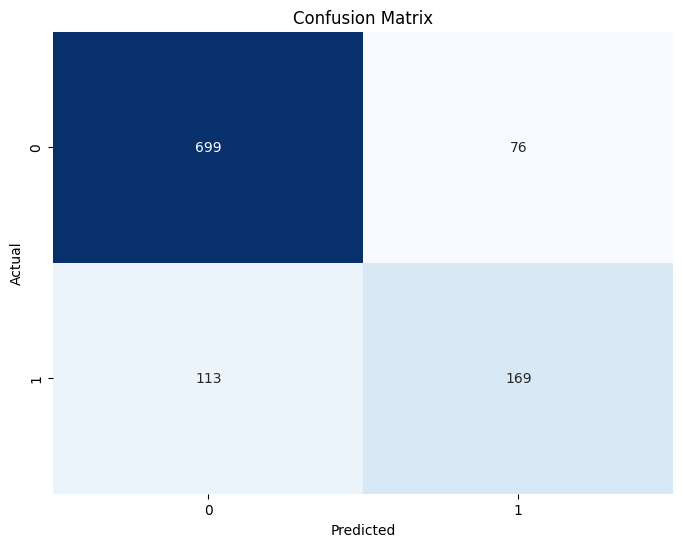

In [71]:
# Retirando Contract
X_train_NoTenure = X_train.drop(columns=['TotalCharges', 'Contract'])
X_test_NoTenure = X_test.drop(columns=['TotalCharges' ,'Contract'])

testar_melhoria_rl(X_train_NoTenure, X_test_NoTenure, y_train, y_test)

Em ambos tivemos um resultado pior do que o base model, não usaremos nenhuma dessas mudanças

#### Escalonando os dados

melhoria da accuracy: 0.0
melhoria do f1: 0.039683149450525534


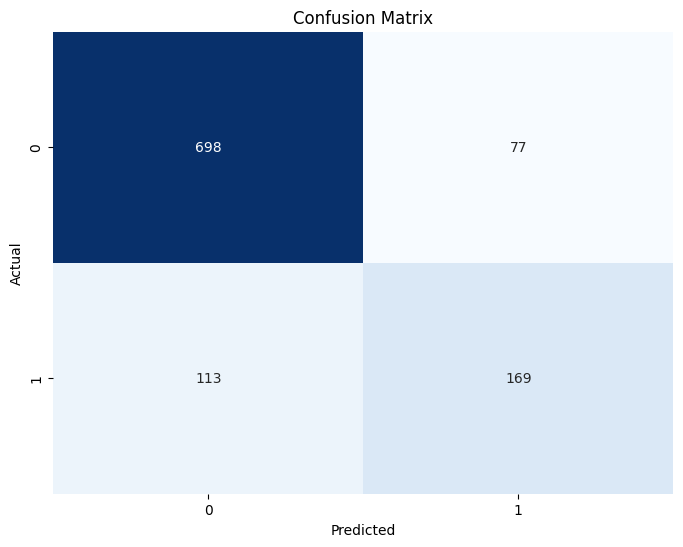

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

testar_melhoria_rl(X_train_scaled, X_test_scaled, y_train, y_test)

Resultado também não foi satisfatório

#### Balanceando os dados

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



melhoria da accuracy: -0.0009460737937558861
melhoria do f1: 0.041182666193944506


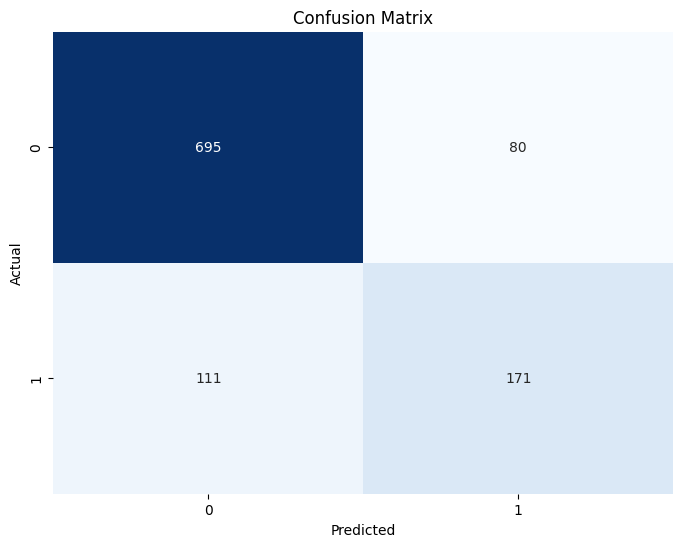

In [74]:
testar_melhoria_rl(X_under, X_test, y_under, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



melhoria da accuracy: -0.07190160832544934
melhoria do f1: 0.01513857071519531


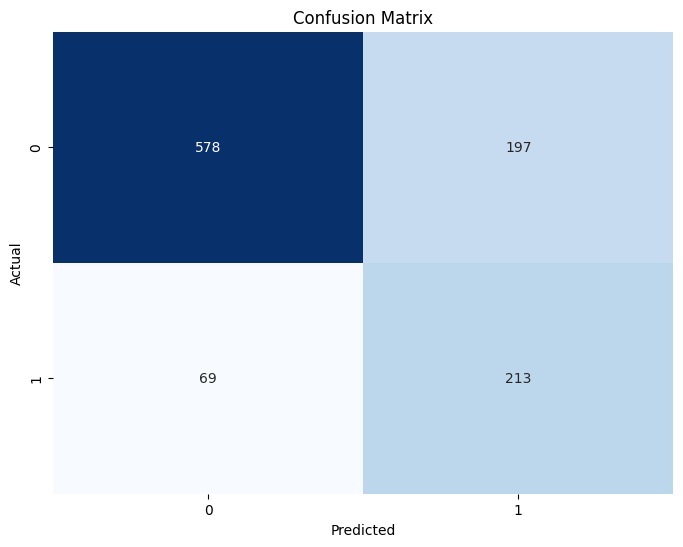

In [73]:
testar_melhoria_rl(X_over, X_test, y_over, y_test)

Semelhante ao que aconteceu no modelo de naive bayes, ele piorou a acuracia dos registros com churn = 0, mas melhorou os do churn = 1, o que é benefico a esse projeto

#### Salvando o melhor modelo de regressão logistica

A unica alteraçao que foi benefica foi o balanceamento dos dados a partir do SMOTE

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



melhoria da accuracy: -0.07190160832544934
melhoria do f1: 0.01513857071519531


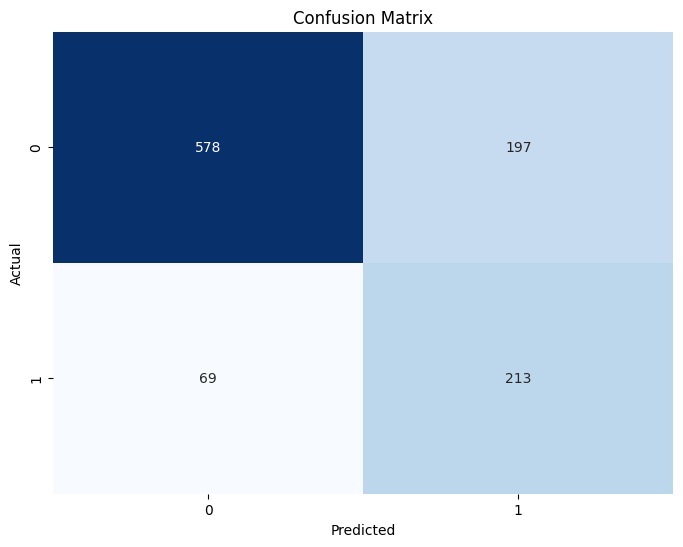

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=10.0, max_iter=300)

In [77]:
# Registrando o melhor modelo de random fortest
parametros = {'C': 10.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
best_rl = LogisticRegression(**parametros)

# Ajuste o modelo aos dados de treinamento
testar_melhoria_rl(X_over, X_test, y_over, y_test)
best_rl.fit(X_over, y_over)

## Combinando os classificadores

Vamos combinar os 3 melhores modelos que fizemos, de forma a previsão final ser feita pelo voto da maioria deles

Testar algumas mudanças como: Mudar o modelo principal para outros, mudar o parametro de confiança, etc...

Accuracy final: 0.7956480605487228
F1 final: 0.6571428571428571


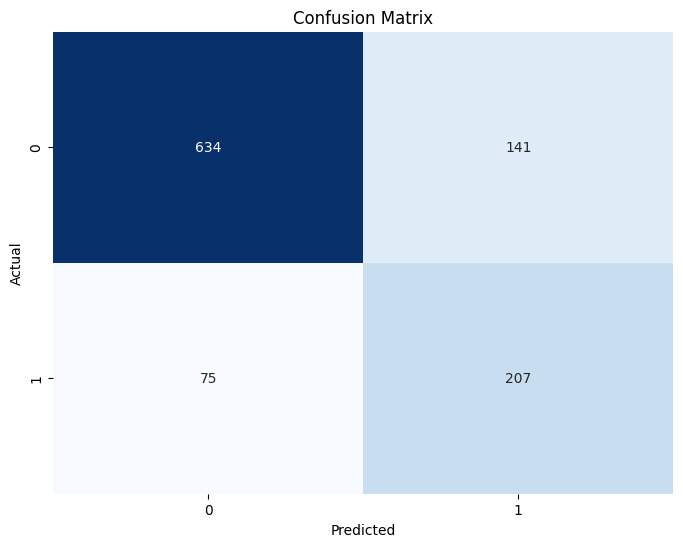

In [91]:
# Faça previsões de probabilidade com o best_nb
y_pred1 = best_nb.predict(X_test_NoTC)
y_pred2 = best_rf.predict(X_test)
y_pred3 = best_rl.predict(X_test)
y_prob_nb = best_nb.predict_proba(X_test_NoTC)

# Inicialize uma lista para armazenar as previsões finais
y_pred_majority = []

# Defina o limite de confiança para o best_nb (90% neste caso)
confidence_threshold = 0.85

# Itere pelas previsões de cada modelo
for i in range(len(X_test)):
    # Verifique se a probabilidade da classe prevista pelo best_nb é menor que o limite
    if np.max(y_prob_nb[i]) < confidence_threshold:
        # Se a confiança for menor que o limite, use o voto da maioria dos outros dois modelos
        majority_vote = np.argmax(np.bincount([y_pred2[i], y_pred3[i]]))
        y_pred_majority.append(majority_vote)
    else:
        # Caso contrário, use a previsão do best_nb
        y_pred_majority.append(y_pred1[i])

# Calcule as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred_majority)
f1 = f1_score(y_test, y_pred_majority)
print(f'Accuracy final: {accuracy}')
print(f'F1 final: {f1}')

# Calcule a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_majority)

# Exiba a matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- Conclusão:
- Conseguimos unir os resultados de forma a mesclar de uma forma satisfatoria a acuracia e o F1, uma vez que os primeiros modelos testados tinham uma acuracia muito boa, mas era pessimo em prever o churn =1. No modelo final consegui diminuir essa difença, aumentando o F1 score, mas perdendo parte da acuracia no processo, o que é válido para esse caso especifico, no qual a taxa de acerto do Churn = 1 é uma métrica de extrema importancia, com isso, chegamos a esse resultado final:
- Acuracia: 0.795
- F1 Score: 0.657